# IMPORT LIBS

In [1]:
import pandas as pd
import numpy as np
import warnings
import cv2 as cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
import urllib.request
from PIL import Image

# IMPORT DATA

In [2]:
image = cv2.imread("inna.jpeg")
if image is None:
    print("Image not found")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
image_rgb = np.array(image_rgb)

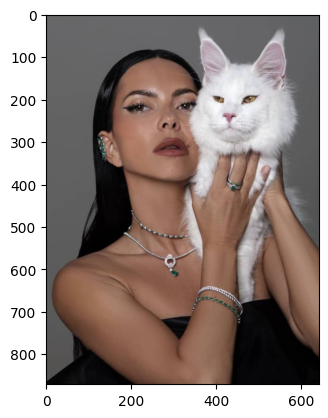

In [4]:
plt.imshow(image_rgb)
plt.show()

## Convertion of BGR image to RGB image

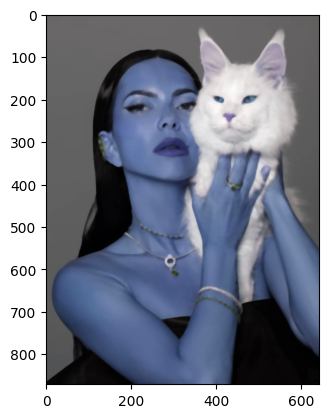

In [5]:
img = cv2.medianBlur(image_rgb, 7)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
img = image_rgb.reshape((-1,3))
display(img.shape)

(559182, 3)

In [7]:
img = np.float32(img)
img.dtype

dtype('float32')

In [8]:
ms = MeanShift(bandwidth=estimate_bandwidth(img, quantile=0.1, n_samples = 2000), bin_seeding=True)
ms.fit(img)

MeanShift(bandwidth=np.float64(23.962656465467326), bin_seeding=True)

In [10]:
clusters = ms.predict(img)
clusters

array([0, 0, 0, ..., 2, 2, 2])

In [12]:
labeled = ms.labels_
labeled

array([0, 0, 0, ..., 2, 2, 2])

In [13]:
img_array = np.unique(labeled)
img_array

array([0, 1, 2, 3, 4, 5])

In [15]:
ms.cluster_centers_

array([[ 98.17214  ,  97.89772  ,  98.688156 ],
       [148.02692  , 106.38627  ,  87.81784  ],
       [  6.682181 ,   5.8863235,   6.816556 ],
       [219.38045  , 218.06175  , 220.7752   ],
       [ 92.89474  , 143.26315  , 123.8421   ],
       [119.375    , 176.25     , 154.125    ]], dtype=float32)

In [16]:
cluster_int8 = np.uint8(ms.cluster_centers_)
cluster_int8

array([[ 98,  97,  98],
       [148, 106,  87],
       [  6,   5,   6],
       [219, 218, 220],
       [ 92, 143, 123],
       [119, 176, 154]], dtype=uint8)

In [17]:
result=np.zeros(img.shape,dtype=np.uint8)
for label in img_array:
  result[labeled==label,:] = cluster_int8[label,:]
result.shape

(559182, 3)

In [18]:
result=result.reshape(image_rgb.shape)
result.shape


(871, 642, 3)

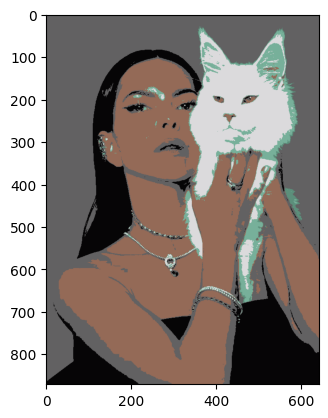

In [20]:
plt.imshow(result)

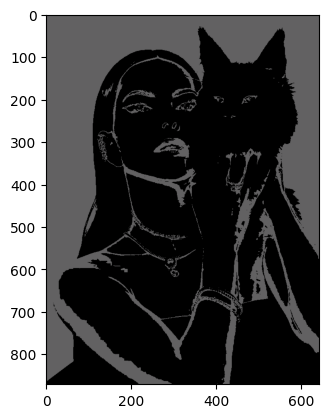

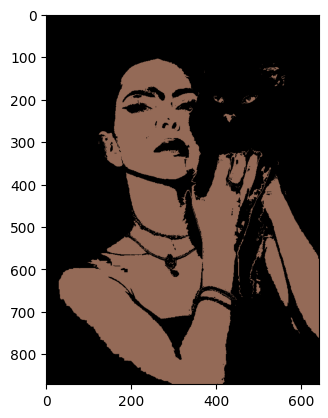

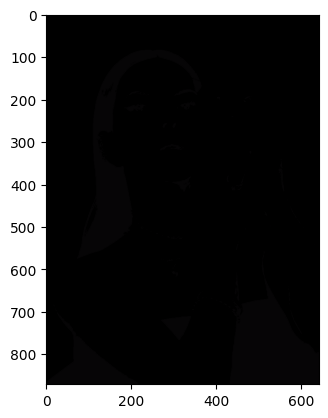

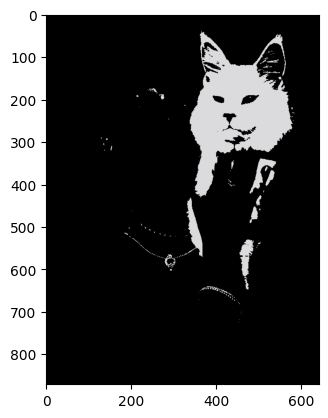

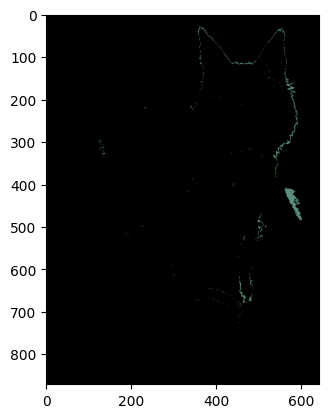

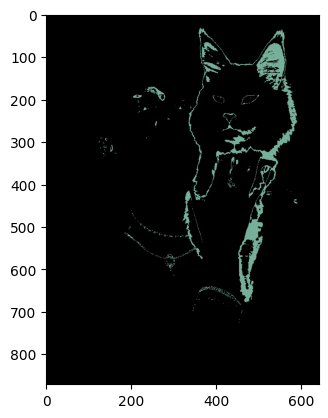

In [22]:
for label in img_array:
  result=np.zeros(img.shape,dtype=np.uint8)
  result[labeled==label,:] = cluster_int8[label,:]
  plt.imshow(result.reshape(image_rgb.shape))
  plt.show()